In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

# Reading Data

In [2]:
data_df = pd.read_csv('Train.csv')
data_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
test_data_df = pd.read_csv("Test.csv")
test_data_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [4]:
data_df.Family_Size = data_df.Family_Size.fillna(0)
data_df.Profession = data_df.Profession.fillna("Other")
data_df.Work_Experience = data_df.Work_Experience.fillna(0)
data_df.Ever_Married = data_df.Ever_Married.fillna("N/A")
data_df.Graduated = data_df.Graduated.fillna("N/A")

test_data_df.Family_Size = test_data_df.Family_Size.fillna(0)
test_data_df.Profession = test_data_df.Profession.fillna("Other")
test_data_df.Work_Experience = test_data_df.Work_Experience.fillna(0)
test_data_df.Ever_Married = test_data_df.Ever_Married.fillna("N/A")
test_data_df.Graduated = test_data_df.Graduated.fillna("N/A")

# Visualizing Data

In [5]:
# Generating colors for each unique value in the data
def get_color_map(data):
    items = np.unique(data)
    item_colors = {}
    colors_item = {}
    for item in items:
        new_color = np.random.randint(0, items.__len__() + 1)
        while new_color in colors_item:
            new_color = np.random.randint(0, items.__len__() + 1)
        item_colors[item] = new_color
        colors_item[new_color] = item

    data_item_colors = []
    for i in data:
        data_item_colors.append(item_colors[i])
    return data_item_colors, colors_item

# Returns the label for the color
def get_color_label(color_dict, label):
    return color_dict[int(label[label.index('{') + 1: label.index('}')])]

In [6]:
data_segmentation_colors, colors_segmentation = get_color_map(data_df.Segmentation)

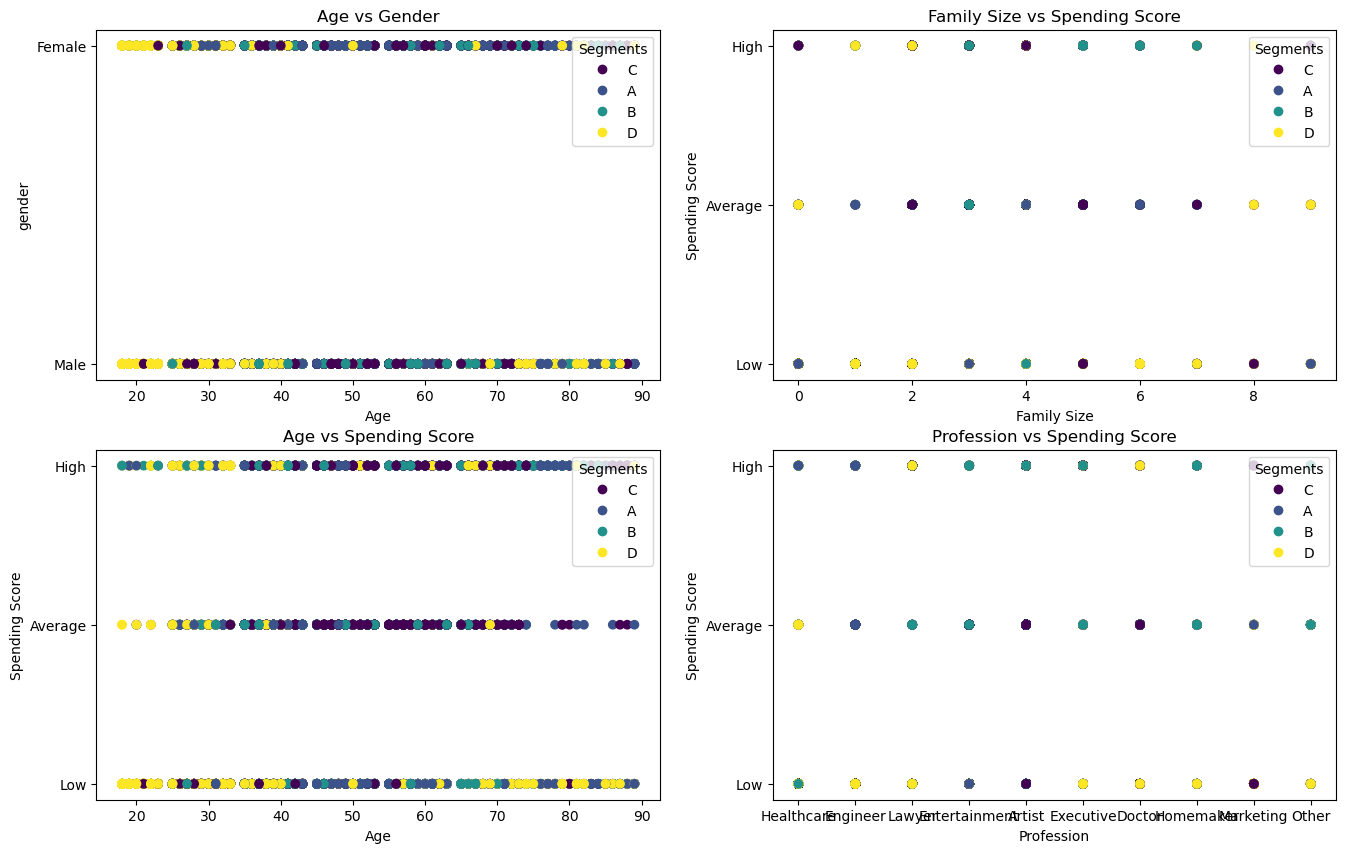

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Displaying Age vs Gender
scatter = axs[0, 0].scatter(data_df.Age, data_df.Gender, c = data_segmentation_colors)
axs[0, 0].title.set_text('Age vs Gender')
plt.setp(axs[0, 0], xlabel='Age', ylabel= 'gender')
colors, labels = scatter.legend_elements()
axs[0, 0].legend(colors, [get_color_label(colors_segmentation, d) for d in labels], loc = 'upper right', title = 'Segments')

# Family Size vs Spending Score
scatter = axs[0, 1].scatter(data_df.Family_Size, data_df.Spending_Score, c = data_segmentation_colors)
axs[0, 1].title.set_text('Family Size vs Spending Score')
plt.setp(axs[0, 1], xlabel='Family Size', ylabel= 'Spending Score')
colors, labels = scatter.legend_elements()
axs[0, 1].legend(colors, [get_color_label(colors_segmentation, d) for d in labels], loc = 'upper right', title = 'Segments')

# Age and Spending SCore
scatter = axs[1, 0].scatter(data_df.Age, data_df.Spending_Score, c = data_segmentation_colors)
axs[1, 0].title.set_text('Age vs Spending Score')
plt.setp(axs[1, 0], xlabel='Age', ylabel= 'Spending Score')
colors, labels = scatter.legend_elements()
axs[1, 0].legend(colors, [get_color_label(colors_segmentation, d) for d in labels], loc = 'upper right', title = 'Segments')

# Profession vs Spending Score
scatter = axs[1, 1].scatter(data_df.Profession, data_df.Spending_Score, c = data_segmentation_colors)
axs[1, 1].title.set_text('Profession vs Spending Score')
plt.setp(axs[1, 1], xlabel='Profession', ylabel= 'Spending Score')
colors, labels = scatter.legend_elements()
axs[1, 1].legend(colors, [get_color_label(colors_segmentation, d) for d in labels], loc = 'upper right', title = 'Segments')

# Preprocessing and Normalizing Data

In [8]:
# Converts categorical value to numerical values
def categorical_to_numerical(df, column_name):
    unique_values = np.unique(df[column_name])
    unique_nums = list(range(0, unique_values.__len__()))
    df[column_name] = df[column_name].replace(unique_values, unique_nums)

In [9]:
# Normalizes the features
def normalize(df, column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    df[column] = (df[column] - mean) / std
    return (mean, std)

In [10]:
data_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


In [11]:
features = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', "Work_Experience", "Spending_Score", "Family_Size"]
labels = ['Segmentation']

# Splitting data
X_df = data_df[features]
y_df = pd.DataFrame(data_df[labels])

test_X_df = test_data_df[features]
test_y_df = pd.DataFrame(test_data_df[labels])

# Converting categorical values to numbers
categorical_to_numerical(X_df, 'Gender')
categorical_to_numerical(X_df, 'Ever_Married')
categorical_to_numerical(X_df, 'Graduated')
categorical_to_numerical(X_df, 'Profession')
categorical_to_numerical(X_df, 'Spending_Score')
categorical_to_numerical(y_df, 'Segmentation')

# Converting categorical values to numbers
categorical_to_numerical(test_X_df, 'Gender')
categorical_to_numerical(test_X_df, 'Ever_Married')
categorical_to_numerical(test_X_df, 'Graduated')
categorical_to_numerical(test_X_df, 'Profession')
categorical_to_numerical(test_X_df, 'Spending_Score')
categorical_to_numerical(test_y_df, 'Segmentation')

C:\Users\asimw\AppData\Local\Temp\ipykernel_19868\1601981081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(unique_values, unique_nums)


In [12]:
# Normalizing only Age and Na to K and leaving categorical features as it is
normalized_dict = {}
normalized_dict['Age'] = normalize(X_df, 'Age')
normalized_dict['Work_Experience'] = normalize(X_df, 'Work_Experience')
normalized_dict['Family_Size'] = normalize(X_df, 'Family_Size')

C:\Users\asimw\AppData\Local\Temp\ipykernel_19868\428396645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - mean) / std


# Training Model

In [52]:
# Predicts value based on weights and features
def predict(theta, X):
    return 1 / (1 + np.exp(-np.dot(theta, np.transpose(X))))

# Returns cost of the outputs
def cost(theta, X, y, lam, num_labels):
    m = y.shape[0]
    J = 0
    temp_theta = np.array(theta)
    temp_theta[:, 0] = 0
    prediction = predict(theta, X)
    for i in range(0, num_labels):
        temp_y = y == i
        temp_prediction = np.transpose(prediction[i])
        J += (1 / m) * np.sum(-np.multiply(temp_y, np.log(temp_prediction)) - np.multiply((1 - temp_y), np.log(1 - temp_prediction))) + (lam / (2 * m)) * np.sum(np.square(temp_theta))
        print((1 / m) * np.sum(-np.multiply(temp_y, np.log(temp_prediction)) - np.multiply((1 - temp_y), np.log(1 - temp_prediction))) + (lam / (2 * m)) * np.sum(np.square(temp_theta)))
    return J

# Returns the updated values of the parameter theta
def gradient(theta, X, y, alpha, lam, num_labels):
    m = y.shape[0]
    n = X.shape[1]
    temp_theta = np.array(theta)
    temp_theta[:, 0] = 0
    regularized_grads = np.zeros(theta.shape)
    prediction = predict(theta, X)
    for i in range(0, num_labels):
        temp_y = y == i
        temp_prediction = np.transpose(prediction[i])
        temp_prediction = np.reshape(temp_prediction, (-1, 1))
        regularized_grads[i] = (alpha / m) * np.dot(np.transpose(temp_prediction - temp_y), X) + (lam / m) * np.reshape(temp_theta[i], (1, -1))
    return theta - regularized_grads

# Returns the accuracy in percentage
def accuracy(y_pred, y):
    y_pred = np.argmax(y_pred, 1)
    return (np.sum(y_pred == y) / len(y_pred)) * 100

# Check whether the graident calculations are correct or not
def checkGradient(theta, X, y, lamda, num_labels):
    epsilon = 1E-4
    i, j = theta.shape
    numericalGrads = np.zeros(theta.shape)
    preturb = np.zeros(theta.shape)
    for r in range(0, i):
        for c in range(0, j):
            preturb[r, c] = epsilon
            value = (cost(theta + preturb, X, y, lamda, num_labels) - cost(theta - preturb, X, y, lamda, num_labels)) / (2 * epsilon)
            numericalGrads[r, c] = value
            preturb[r, c] = 0
    return np.linalg.norm(numericalGrads - theta) / np.linalg.norm(numericalGrads + theta)

Splitting Data in training and testing sets

In [53]:
t = np.zeros((3, 2))
x = np.array([[1, 2], [1 ,4], [1, 6]])
y_t = np.array([[0], [0], [0]])
lamda = 0
num_labels = 1
print(predict(t, x))
print(cost(t, x, y_t, 0, 1))
# print('Before Gradient')
# print(t)
# nmgrad = checkGradient(t, x, y_t, lamda, num_labels)
# print(nmgrad)

# for i in range(50):
#     t = gradient(t, x, y_t, 0.01, lamda, num_labels)

# print('After Gradient')
# print(t)
# nmgrad = checkGradient(t, x, y_t, lamda, num_labels)
# print(nmgrad)

[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]
2.0794415416798357
2.0794415416798357


In [33]:
np.log(0.5)

-0.6931471805599453

In [97]:
m, n = X_df.shape
split_percentage = 0.95
total_training_samples = int(m * split_percentage)
training_samples = np.random.choice(m, total_training_samples, False)
testing_samples = np.delete(list(range(0, m)), training_samples)

# Defining training and testing sets
X = np.array(X_df)

# Concatenating 1 to the begining of each row
ones = np.ones((m, 1))
X = np.concatenate((ones, X), axis=1)

y = np.array(y_df)
X_train = X[training_samples]
y_train = y[training_samples]
X_test = X[testing_samples]
y_test = y[testing_samples]

In [98]:
# Shapes of Training and Testing sets
print('Training Set')
print(X_train.shape, y_train.shape)
print('Testing Set')
print(X_test.shape, y_test.shape)

Training Set
(7664, 9) (7664, 1)
Testing Set
(404, 9) (404, 1)


## Defining Required Variables

In [99]:
num_labels = np.unique(y_df).__len__()
num_features = X_df.shape[1]
theta = np.random.rand(num_labels, num_features + 1)
lam = 2
learning_rate = 0.01
epochs = 500
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

In [100]:
X_train.shape, theta.shape

((7664, 9), (4, 9))

In [26]:
for epoch in tqdm(range(1, epochs)):
    # Finding the training loss
    training_loss = cost(theta, X_train, y_train, lam, num_labels)
    # Finding the validation loss
    validation_loss = cost(theta, X_test, y_test, lam, num_labels)
    # Finding the training accuracy
    training_pred = predict(theta, X_train)
    training_accuracy = accuracy(np.transpose(training_pred), y_train)
    # Finding the validation accuracy
    validation_pred = predict(theta, X_test)
    validation_accuracy = accuracy(np.transpose(validation_pred), y_test)
    # Updating the theta
    theta = gradient(theta, X_train, y_train, learning_rate, lam, num_labels)
    # Displaying information
    print(f'Epoch: {epoch}, Training Loss: {round(training_loss, 2)}, Training Acc: {round(training_accuracy, 2)}, Validation Loss: {round(validation_loss, 2)}, Validation Acc: {round(validation_accuracy, 2)}')
    # Storing the data in the history
    history['loss'].append(training_loss)
    history['accuracy'].append(training_accuracy)
    history['val_loss'].append(validation_loss)
    history['val_accuracy'].append(validation_accuracy)

NameError: name 'epochs' is not defined

# Visualizing Results

In [252]:
np.sum(checkGradient(theta, X_train, y_train, lamda, num_labels))

1.0347610404499317

Text(0.5, 1.0, 'Loss & Validation Loss vs Training Epochs')

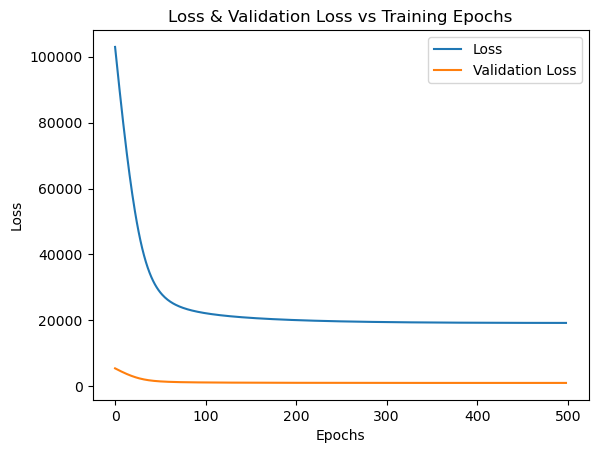

In [102]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss & Validation Loss vs Training Epochs')

Text(0.5, 1.0, 'Accuracy & Validation Accuracy vs Training Epochs')

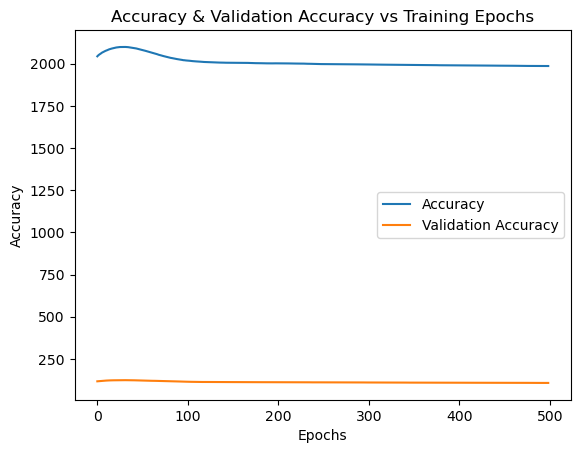

In [103]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy & Validation Accuracy vs Training Epochs')